Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [8]:
df = data.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [9]:
df.head()

0    1986-Q1
1    1986-Q2
2    1986-Q3
3    1986-Q4
4    1987-Q1
Name: Quarter, dtype: object

In [10]:
data['quater'] = pd.to_datetime(df).dt.strftime('%b-%Y')

In [11]:
data.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [12]:
data.drop(['Quarter'],axis=1,inplace=True)

In [13]:
data.head()

,Sales,quater
0,1734.827000,Jan-1986
1,2244.960999,Apr-1986
2,2533.804993,Jul-1986
3,2154.962997,Oct-1986
4,1547.818996,Jan-1987


In [14]:
data.dtypes

Sales     float64
quater     object
dtype: object

In [15]:
data.quater=pd.to_datetime(data.quater)

In [17]:
data.dtypes

Sales            float64
quater    datetime64[ns]
dtype: object

In [18]:
data.set_index(data.quater,drop=True,inplace=True)

In [22]:
data.head(1)

,Sales,quater
quater,,
1986-01-01,1734.827,1986-01-01


In [23]:
data.rename(columns={'quater':'Quarter'},inplace=True)

In [24]:
data.head()

,Sales,Quarter
quater,,
1986-01-01,1734.827000,1986-01-01
1986-04-01,2244.960999,1986-04-01
1986-07-01,2533.804993,1986-07-01
1986-10-01,2154.962997,1986-10-01
1987-01-01,1547.818996,1987-01-01


In [25]:
data.drop(["Quarter"],axis=1,inplace=True)

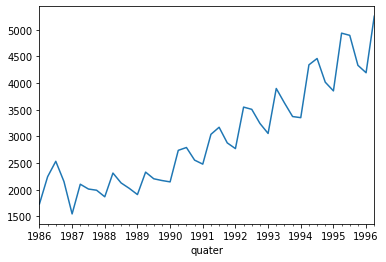

In [28]:
data.Sales.plot()
plt.show()

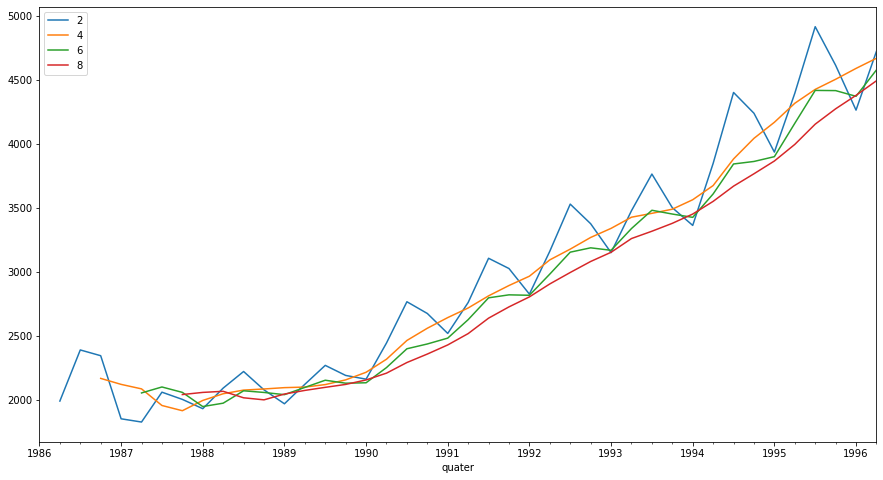

In [32]:
plt.figure(figsize=(15,8))
for i in range(2,10,2):
  data.Sales.rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")
plt.show()

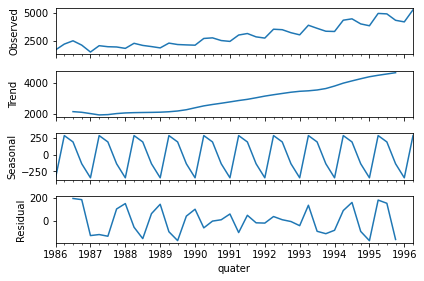

In [34]:
ts_add = seasonal_decompose(data.Sales,model="additive")
fig = ts_add.plot()
plt.show()

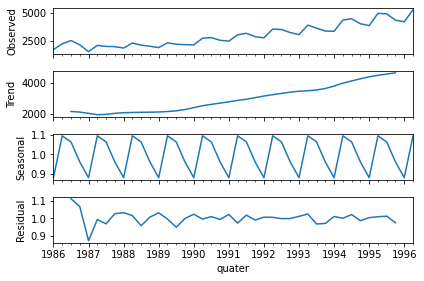

In [36]:
ts_mul = seasonal_decompose(data.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

## ARIMA Model

In [38]:
X=data.Sales.values

In [39]:
split=int(len(X)*0.70)

In [40]:
train,test=X[0:split], X[split:len(X)]

In [42]:
model=ARIMA(train,order=(5,1,0))

In [43]:
model_fit = model.fit(disp=0)

In [44]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -184.507
Method:                       css-mle   S.D. of innovations            159.900
Date:                Sat, 16 Oct 2021   AIC                            383.014
Time:                        15:20:21   BIC                            392.339
Sample:                             1   HQIC                           385.865
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3312     25.444      1.624      0.119      -8.539      91.201
ar.L1.D.y     -0.1640      0.190     -0.862      0.398      -0.537       0.209
ar.L2.D.y     -0.3024      0.147     -2.051      0.0

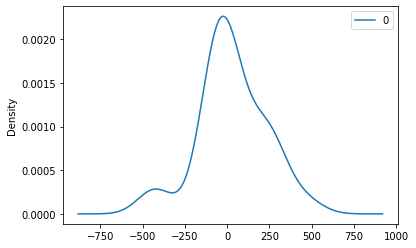

                0
count   28.000000
mean    29.706788
std    196.802723
min   -430.718971
25%    -66.176486
50%    -10.201872
75%    170.793435
max    468.802791


In [45]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

The plot of the residual errors suggests that there may still be some trend information not captured by the model

## Rolling Forecast ARIMA Model

In [46]:
history = [x for x in train]

In [47]:
predictions = []

In [48]:
for i in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[i]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3734.224133, expected=3899.000000
predicted=3782.621947, expected=3629.000000
predicted=3355.125701, expected=3373.000000
predicted=3297.217395, expected=3352.000000
predicted=4112.814424, expected=4342.000000
predicted=3961.044555, expected=4461.000000
predicted=4130.784722, expected=4017.000000
predicted=3912.794435, expected=3854.000000
predicted=4687.044089, expected=4936.000000
predicted=4970.518899, expected=4895.000000
predicted=4384.039784, expected=4333.000000
predicted=4207.687250, expected=4194.000000
predicted=5261.672027, expected=5253.000000


In [51]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34115.876


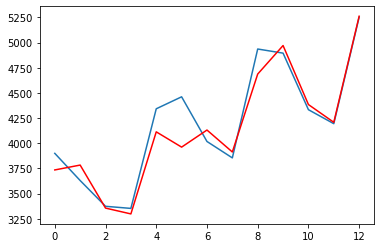

In [52]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Multiple Models

In [55]:
df=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [56]:
df2 = pd.get_dummies(df, columns = ['Quarter'])

In [58]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [59]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
t= np.arange(1,43)

In [61]:
df2['t'] = t

In [62]:
df2['t_sq'] = df2['t']*df2['t']

In [63]:
log_Sales=np.log(df2['Sales'])

In [64]:
df2['log_Sales']=log_Sales

In [65]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q2,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q3,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,25,7.344602


In [66]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [69]:
linear= smf.ols('Sales ~ t',data=train1).fit()
pred_lin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(pred_lin))**2))
rmselin

580.1224130918632

In [70]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.729797503746

In [71]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900199

In [72]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186959

In [73]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372303

In [75]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.11444360534546

In [76]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954456

In [79]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911933206

In [80]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.561946734645

## CONCLUSION

In [81]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [82]:
rmse=pd.DataFrame(output)

In [83]:
rmse

,Model,Values
0,rmse_mul_quad,3630.561947
1,rmseadd,1869.718821
2,rmseaddlinear,596.152628
3,rmseaddquad,412.114444
4,rmseexpo,588.140510
5,rmselin,580.122413
6,rmsemul,2374.919441
7,rmsemulin,5359.687912
8,rmsequad,783.729798


In [92]:
rmse[rmse.Values==rmse.min()[1]]

,Model,Values
3,rmseaddquad,412.114444


## Additive seasonality with quadratic trend has the best RMSE value